<b><center> Homework 2 </center></b>
<br>
<b><center> James Bonifield </center></b>
<br>
<br>
<b>Question 2.2</b><br>
Use k-Nearest Neighbor model to find a good classifier:
<br>
a) using cross-validation <br>
b) splitting the data into training, validation, and test data sets

In [192]:
library(kernlab)
library(ggplot2)
data <- read.delim('credit_card_data-headers.txt', header=TRUE)
row_num <- nrow(data)

[1] "Best K-Value was found to be:"

[1] 12

[1] "With an accuracy % of:"

[1] 0.853211

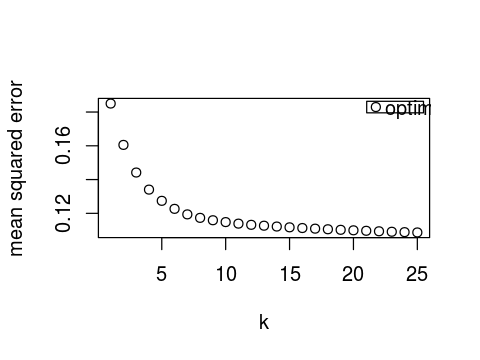

In [198]:
library(kknn)
library(ggplot2)
data=read.table("credit_card_data-headers.txt",header=TRUE)
row_num <- nrow(data)
kmax <- 25
#Use train.kknn for cross-validation
model <- train.kknn(R1~., data, kmax=kmax, kernel =  "optimal", SCALE = TRUE)
plot(model)
accuracy <- 0
# Test K from 1-25, and find the highest accuracy value for k
for (k in 1:kmax){
predicted <- as.integer(fitted(model)[[k]][1:nrow(data)] + 0.5)
accuracy[k] <-sum(predicted == data$R1)
}
accuracy_pct <-max(accuracy)/nrow(data)
"Best K-Value was found to be:"
which.max(accuracy)
"With an accuracy % of:"
accuracy_pct

In [200]:
#d_train <- data[1:row_num*(2/3),]
#d_test <- data[row_num*(2/3)+1:row_num*(5/6),]
#d_valid <- data[row_num*(5/6)+1:row_num,]
set.seed(1)
m <- dim(data)[1]
val <- sample(1:m, size = round(m/3), replace = FALSE, prob = rep(1/m, m)) 
data.learn <- data[-val,]
data.valid <- data[val,]
predictions <- c()
kmax <-25
#Find best k-value with learning and test data
for (k in 1:kmax){
    modelb <- kknn(R1~.,data.learn, data.learn, k = k, kernel = "optimal", scale=TRUE)
    #predictions[k] <- sum(as.integer(fitted(modelb)+0.5)/nrow(d_train))}
    predictions[k] <- sum(as.integer(fitted(modelb)+0.5)/nrow(data.valid))}
max_pred <- predictions[which.max(predictions)]
"Best K value was found to be"
which.max(predictions)

#Test Model with optimum k-value
data.test <- data[sample(1:m, size = round(m/1), replace = FALSE, prob = rep(1/m, m)),]
test_model <- kknn(R1~.,data.learn, data.learn, k = which.max(predictions), kernel = "optimal", scale=TRUE)
test_prediction <- sum(as.integer(fitted(modelb)+0.5)/nrow(data.valid))

"Model was tested with accuracy of:"
test_prediction


[1] "Best K value was found to be"

[1] 16

[1] "Model was tested with accuracy of:"

[1] 0.9357798

<b>Question 4.1</b>
<br>
<i>Describe a situation or problem from your job, everyday life, current events, etc., for which a clustering
model would be appropriate. List some (up to 5) predictors that you might use.</i><br><br>
In a little over a month the Academy Awards will take place. Classifying movies is an important part of this awards process, and we could consider the following variables among others:
- Rating (e.g. Rotten Tomatos rating)
- Box Office Gross
- Genre
- Number of movie goers
Here's a fun article that follows up on this situation -> https://fivethirtyeight.com/features/the-four-types-of-vin-diesel-movies/

<b>Question 4.2</b>
<br>
<i>Use the R function kmeans to cluster the points as well as possible. Report the best combination of
predictors, your suggested value of k, and how well your best clustering predicts flower type.</i><br>

In [214]:
library(datasets)
data(iris)
iris_params <- iris[,-5]
iris_results <- iris[,5]
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


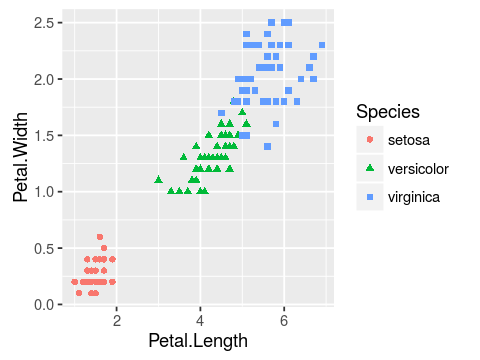

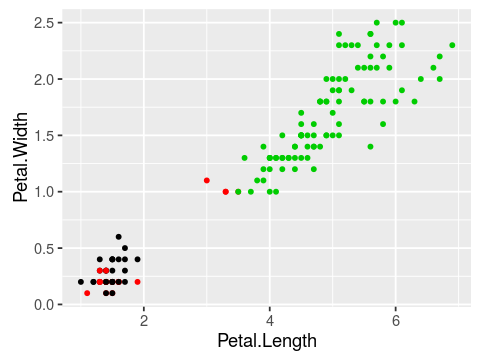

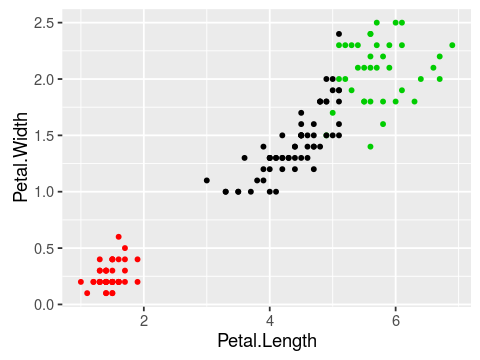

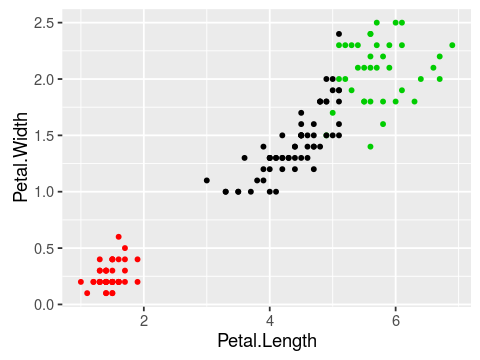

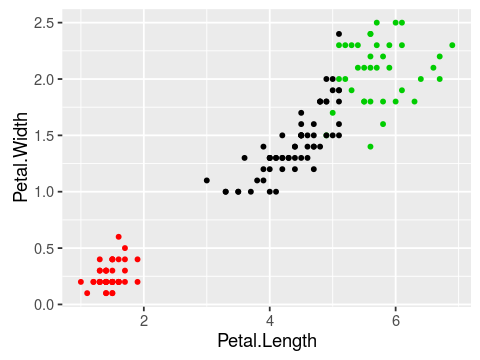

In [225]:
k_vec <- c(3,5,10,25)
plot_initial <- (ggplot(iris, aes(Petal.Length, Petal.Width), col=species)
            + geom_point(aes(color=Species, shape=Species)))
print(plot_initial)
for (k in 1:4){
    iris_model <- kmeans(iris_params, 3, iter.max = k_vec[k])
    iris_actual <- table(iris_results, iris_model$cluster)

    iris_model$cluster <- as.factor(iris_model$cluster)
    plot <- (ggplot(iris, aes(Petal.Length, Petal.Width))
            + geom_point(size=1, colour=iris_model$cluster))
    print(plot)
    }

Testing of the 4 different iris parameters showed that petal width and length were fairly accurate parameters to base this model on. <br><br>
From the above Plots, we can see that K convergest pretty quickly, and we should be fine picking the smallest stable k-value of: $$k=5$$ <br>
which predicts the flower type reasonably well.